# Finite Volumina zur Lösung der linearen, eindimensionalen Advektionsgleichung

In [178]:
# wie immer, lass uns einige wichtige Module importieren
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker as mtick

---

## Aufgabe 6.2
Die eindimensionale Transportgleichung einer Größe $\phi(x,t)$ in einem mit konstantem Geschwindigkeit $U$ strömenden Fluid ist wie folgt gegeben:

\begin{equation}
    \phi_{/t} + U\phi_{/x} = 0 \qquad \qquad (1)
    \label{eq:advekt}
\end{equation}

Die Gleichung (1) kann beispielsweise die Verteilung einer Tinte in einem Fluid darstellen. Diskretisieren und Lösen Sie Gleichung (1) mit Hilfe der finiten Volumen Methode und mit periodischen Randbedingungen. 

a) Definieren Sie die Parameter des Gitters und der Gleichung. Wählen Sie $U=1$ und $L_x=1$ aus, wobei $L_x$ die Länge des Lösungsgebiet $x \in (0,L_X)$ ist. Ein weiterer Parameter ist die Anzahl von Zeitschritten $N_t = \{ 10, 20, 100 \}$. Wählen Sie eine beliebige Anzahl $N_x$ von Volumina, mit den Sie das Lösungsgebiet diskretisieren wollen. Definieren Sie auch den dimensionslosen Parameter $\sigma = U / (\Delta x / \Delta t) = \{ 1.5, 0.8, 0.5, 0.1 \}$, mit dem Sie den Zeitschritt auswählen werden. 

In [179]:
##########
# INPUTS #
##########

L = 1.0      # [m] Länge des Gebiets
U = 1.0      # [m/s] Advektionsgeschwindigkeit
Nt = 30      # Anzahl der zu berechnende Zeitschritte
Nx = 51      # Anzahl von Zellen / Kontrollvolumina (KV)
sigma = 0.5  # dimensionsloser Parameter U/(dx/dt) = U dt / dx = sigma

b) Definieren Sie die Vektoren $\mathbf{x}$ der Koordinaten von den Mittelpunkten der Kontrollvolumina (KV), $\mathbf{\phi}$ der unbekannten Lösungsvariable, $\mathbf{F}$ der Flüsse an den KV Grenzflächen. Nachdem Sie in dem oberen Block $N_x$ und $\sigma$ definiert haben, können Sie jetzt die Breite $\Delta x$ des Kontrollvolumens und die Zeitschrittweite $\Delta t$ auch definieren.

In [180]:
dx = L/Nx                       # [m] Auflösung
dt = sigma * dx / U             # [s] Zeitschritt

x = (np.arange(Nx)+1/2)*dx      # Gitter (Vektor der Koordinate von den KV Mittelpunkten)
phi = np.zeros(Nx)              # Vektor der im KV gemittelten phi-Werte
F = np.zeros(Nx+1)              # Vektor der Flüsse an den KV Grenzflächen

c) Deklarieren Sie die Anfangsbedingung $\phi(x_i,t=0)$ so wie in Aufgabe 6.1f) eingeführt.

In [181]:
# Zuerst definieren wir einen Vektor der richtigen Größe
phi0 = np.zeros(Nx)
# Wir gehen durch die Einträge von phi0 mit einer For-Schleife
for i in range(Nx):
    # und machen eine Fallunterscheidung, so wie die 
    # Definition der Anfangsbedingung es fordert
    if (x[i]/L)>=0.25 and (x[i]/L)<=0.5:
        phi0[i] = 4.0*(x[i]/L - 0.25)
    elif (x[i]/L)>0.5 and (x[i]/L)<=0.75:
        phi0[i] = 4.0*(0.75 - x[i]/L)
    else:
        phi0[i] = 0

Wir stellen die Anfangsbedingung dar, um sicher zu stellen, dass wir keine Fehler gemacht haben. 

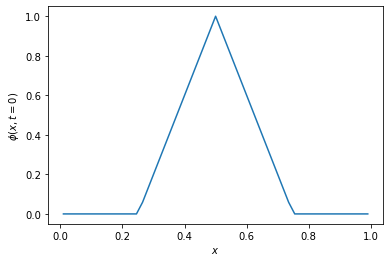

In [182]:
plt.figure()
plt.plot(x,phi0)
plt.xlabel(r'$x$')
plt.ylabel(r'$\phi(x,t=0)$')
plt.show()

d) Iterieren Sie über $N_t$ Zeitschritte mit dem Index $0 \leq n \leq N_t$.
* Iterieren Sie über alle KV Grenzflächen und berechnen Sie alle Flüsse $F_{i+1/2}^n$ und speichern Sie in den Vektor $\mathbf{F}$.
* Iterieren Sie über alle Volumina und berechnen Sie die Bilanz der Flüsse für jedes Volumen. Aktualisieren Sie die Lösung $\mathbf{\phi}$.
    
Hinweis: Für die Berechnung der Flüsse an den Grenzflächen am Rand des Lösungsgebietes (also $F_{1/2}$ und $F_{Nx+1/2}$) können Sie die Fähigkeit von Python ausnutzen, den letzten Index eines Arrays duch dem Index `-1` aufzurufen, sowie die Modulo-Funktion `a % b`, welche den Rest der Division zwischen `a` und `b` ergibt.

In [183]:
# Zuerst definieren wir die Zeit
# vor der Integration sind wir beim Zeitpunkt null
t=0
# Wir kopieren unsere anfangsbedingung in den 
# Lösungsvektor
phi = phi0.copy()
# Wir starten die zeitliche Integration
# als For-Schleife für Nt Zeitschritte
for n in range(Nt):
    # Wir aktualisieren die Zeit
    t = t + dt
    # Wir berechnen die Flüsse mit linearer Interpolation
    for iF in range(Nx+1):
        F[iF] = 0.5*U*(phi[iF-1]+phi[iF%Nx])
    # Wir aktualisieren die Lösung
    for i in range(Nx):
        phi[i] += (dt/dx)*(F[i]-F[i+1])


Bevor wir die Lösung darstellen, ist es sinnvoll, die analytische exakte Lösung des Problems herzuleiten. 

In [184]:
# Wir definieren den Vektor der exakten Lösung
phi_exakt = np.zeros(Nx)
# Sowie mit der Anfangsbedingung, gehen wir 
# durch die Einträge von phi_exakt mit einer For-Schleife
for i in range(Nx):
    # Jetzt müssen wir die Koordinate sinnvoll definieren, 
    # so dass wir die periodische Randbedingung berücksichtigen
    xx = (x[i]-U*t)/L
    xx -= np.floor(xx)
    # und machen eine Fallunterscheidung, so wie die 
    # im Falle der Anfangsbedingung
    if (xx)>=0.25 and (xx)<=0.5:
        phi_exakt[i] = 4.0*(xx/L - 0.25)
    elif (xx/L)>0.5 and (xx/L)<=0.75:
        phi_exakt[i] = 4.0*(0.75 - xx/L)
    else:
        phi_exakt[i] = 0

e) Stellen Sie das Ergebnis dar und überprüfen Sie diese, in dem Sie es mit dem erwarteten Ergebnis vergleichen. Probieren Sie die unterschiedlichen vorgeschlagenen Parameter aus. Was beobachten Sie?

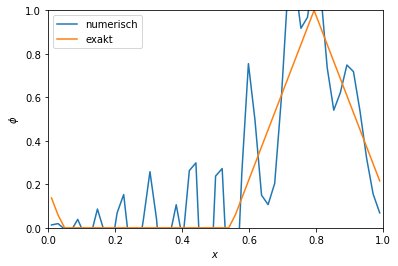

In [185]:
# Wir öffnen eine neue Abbildung
plt.figure()
# wir stellen die exakte und numerische Lösung dar
plt.plot(x,phi,label='numerisch')
plt.plot(x,phi_exakt,label='exakt')
# wir setzen Grenzen für die x- und y-Achse:
# Wir sehen gleich wozu wir das brauchen
plt.ylim([0,1])
plt.xlim([0,1])
# wir zeigen die Legende an
plt.legend()
# und beschriften die Achsen
plt.xlabel(r'$x$')
plt.ylabel(r'$\phi$')
plt.show()

---

## Aufgabe 6.3

Irgendetwas stimmt offensichtlich nicht (das haben Sie sicher schon bemerkt) in dem Ergebnis aus Aufgabe 6.2. Um das Problem zu beheben, berechnen Sie den Fluss an der KV Grenzfläche mit der folgenden einseitigen Formel in Abhängigkeit vom Wert der Advektionsgeschwindigkeit $U$ (``Aufwind'') berechnet:

\begin{equation}
    F_{i+1/2} = \left\{
        \begin{array}{ll}
        F_i & U \geq 0 \\
        F_{i+1} & U < 0 \\
        \end{array}
        \right. 
\end{equation}

Führen Sie Ihren Code mit denselben Parameterwerten wie in Teilaufgabe 6.2f) aus. Was beobachten Sie jetzt?

In [186]:
# Wir setzen die Zeit auf null zurück
t=0
# Wir kopieren erneut unsere anfangsbedingung  
# in den Lösungsvektor
phi = phi0.copy()
# Wir starten die zeitliche Integration
# als For-Schleife für Nt Zeitschritte
for n in range(Nt):
    # Wir aktualisieren die Zeit
    t = t + dt
    # wir berechnen die Flüsse durch Aufwind Interpolation
    for iF in range(Nx+1):
        F[iF] = U*(phi[iF-1])
    # und aktualisieren die Lösung
    for i in range(Nx):
        phi[i] += (dt/dx)*(F[i]-F[i+1])


Wir stellen erneut das Ergebnis dar: was beobachten Sie?

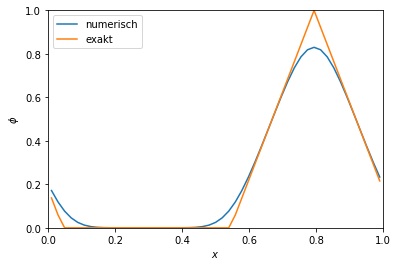

In [188]:
# Wir öffnen eine neue Abbildung
plt.figure()
# wir stellen die exakte und numerische Lösung dar
plt.plot(x,phi,label='numerisch')
plt.plot(x,phi_exakt,label='exakt')
# wir setzen Grenzen für die x- und y-Achse
plt.ylim([0,1])
plt.xlim([0,1])
# wir zeigen die Legende an
plt.legend()
# und beschriften die Achsen
plt.xlabel(r'$x$')
plt.ylabel(r'$\phi$')
plt.show()